### Recommender Systems

In [1]:
import pandas as pd
import numpy as np
import latent_factor_model

import matplotlib.pyplot as plt

In [2]:
jokes_data = pd.read_csv('dataset/jester-data-1.csv', header=None)

#### Data Analysis and Preprocessing

In [3]:
jokes_data.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [4]:
jokes_data.shape

(24983, 101)

#### In this matrix, ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

In [5]:
jokes_data.replace(99, np.nan, inplace=True)

#### The first column gives the number of jokes rated by the indexed user. The next 100 columns give the ratings for jokes 01 - 100.

In [6]:
# Since we don't need this feature of 'number of jokes rated by a particular user', we are going to remove it from our matrix.
jokes_data.drop(0, axis=1, inplace=True)

In [7]:
#worst rated jokes by users
worst_jokes = jokes_data.idxmin(axis=1).value_counts().sort_index()

#best rated jokes by users
best_jokes = jokes_data.idxmax(axis=1).value_counts().sort_index()

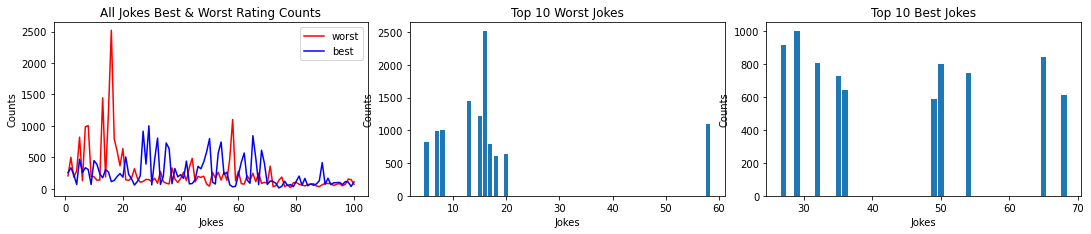

In [8]:
fig, axs = plt.subplots(1,3, figsize=(15,3))
fig.tight_layout()

axs[0].plot(worst_jokes.sort_index().index, worst_jokes.sort_index(), 'r', label='worst')
axs[0].plot(best_jokes.sort_index().index, best_jokes.sort_index(), 'b', label='best')
axs[0].set_title('All Jokes Best & Worst Rating Counts')
axs[0].legend()

worst10 = worst_jokes.sort_values(ascending=False)[:10].sort_index()
best10 = best_jokes.sort_values(ascending=False)[:10].sort_index()
axs[1].bar(worst10.index, worst10)
axs[1].set_title('Top 10 Worst Jokes')

axs[2].bar(best10.index, best10)
axs[2].set_title('Top 10 Best Jokes')

for ax in axs.flat:
    ax.set(xlabel='Jokes', ylabel='Counts')

In [9]:
rated = np.where(jokes_data!=4.08)
rated

(array([    0,     0,     0, ..., 24982, 24982, 24982], dtype=int64),
 array([ 0,  1,  2, ..., 97, 98, 99], dtype=int64))

In [10]:
def replace(orig, percentage=0.1):
    """
    Replaces 'percentage'% of the original values in 'orig' with 99's
    :param orig: original data array
    :param percentage: percentage of values to replace (0<percentage<1)
    """
    
    new_data = orig.copy()
    rated = np.where(jokes_data_array!=np.NaN)
    n_rated = len(rated[0])
    idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
    new_data[rated[0][idx], rated[1][idx]] = np.NaN
    return new_data, (rated[0][idx], rated[1][idx])

In [11]:
jokes_data_array = jokes_data.to_numpy()
training_data, validation_idx = replace(jokes_data_array)

#### Training the model and making predictions

In [13]:
model = latent_factor_model.lf_model(training_data)

In [14]:
print(model.latent_user_preferences.shape)
print(model.latent_item_features.shape)

(24983, 2)
(100, 2)


Iteration 0/10:	MSE=26.167491
Iteration 2/10:	MSE=24.977219
Iteration 4/10:	MSE=24.544533
Iteration 6/10:	MSE=24.113353
Iteration 8/10:	MSE=23.677396


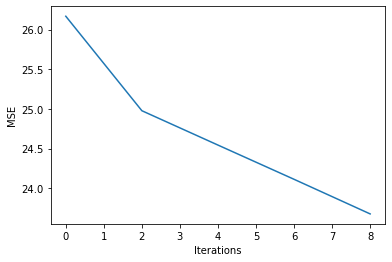

In [15]:
num_iter = 10
hist = model.train(num_iter)
plt.figure()
plt.plot(np.arange(0, num_iter, 2), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

 Note how the MSE decreases with the number of iterations

In [16]:
predictions = model.latent_user_preferences.dot(model.latent_item_features.T)
print(predictions.shape)
print(predictions)

(24983, 100)
[[1.09501396 0.66941775 0.70438493 ... 1.28490654 0.47191729 1.7335851 ]
 [0.80976891 0.47053938 0.4541537  ... 0.81997915 0.32241876 1.20521783]
 [2.11136132 1.30526145 1.39771662 ... 2.55466766 0.92567451 3.38812503]
 ...
 [0.81512424 0.52817169 0.6056892  ... 1.11519023 0.38367354 1.38405292]
 [0.43779979 0.26028829 0.26158956 ... 0.47463833 0.18070457 0.67006429]
 [1.20501054 0.74509105 0.79810484 ... 1.45877918 0.5284627  1.93414302]]


In [17]:
values = [zip(training_data[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = jokes_data.columns

#### Final snapshot of the data
with each data point as (original value, prediction)

In [18]:
comparison_data.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, 1.0950139613121064)","(nan, 0.6694177525272315)","(-9.66, 0.7043849333809115)","(-8.16, -0.6914932212327661)","(-7.52, 0.7418463068228887)","(-8.5, 1.895641697924576)","(nan, -0.001727295306820937)","(4.17, -0.34075535963483244)","(nan, -0.07345037006076881)","(-4.76, 1.3825962645601644)",...,"(2.82, 2.0901439221211953)","(nan, 1.505864449654606)","(nan, 2.5209931984298652)","(nan, 1.3560974061397129)","(nan, 1.2717154198882838)","(nan, 1.6947711738343063)","(-5.63, 1.8168698524037958)","(nan, 1.2849065375321018)","(nan, 0.4719172926671351)","(nan, 1.7335850984173278)"
1,"(nan, 0.8097689052726282)","(-0.29, 0.4705393800121926)","(6.36, 0.4541537007321023)","(4.37, -0.4741551359549921)","(-2.38, 0.4218003085219904)","(-9.66, 1.2675714494014967)","(-0.73, -0.08257881402778729)","(-5.34, -0.2463876530461764)","(8.88, 0.030229037798397605)","(9.22, 1.0402952515236084)",...,"(2.82, 1.4638612363323618)","(-4.95, 1.1466245737196747)","(-0.29, 1.953220167147285)","(7.86, 1.03073055341922)","(-0.19, 0.9690272193956169)","(-2.14, 1.203710421431944)","(3.06, 1.1438980319136132)","(0.34, 0.8199791465878793)","(-4.32, 0.3224187617440039)","(1.07, 1.2052178268592497)"
2,"(nan, 2.111361320330507)","(nan, 1.3052614454679246)","(nan, 1.3977166158289966)","(nan, -1.3553576279913349)","(9.03, 1.5055360729576934)","(9.27, 3.7346620983264045)","(9.03, 0.04484686547670862)","(9.27, -0.6603507112950097)","(nan, -0.1917240080236951)","(nan, 2.6552837831729414)",...,"(nan, 4.078610155773689)","(nan, 2.8839740112746353)","(nan, 4.8081775433267175)","(9.08, 2.5982454153493326)","(nan, 2.4351301168049413)","(nan, 3.297170054935276)","(nan, 3.6215445207063177)","(nan, 2.5546676553244376)","(nan, 0.9256745111743545)","(nan, 3.3881250290838087)"
3,"(nan, 1.4344962118619864)","(8.35, 0.869651371966479)","(nan, 0.9028665242272981)","(nan, -0.894782260085169)","(1.8, 0.9340394140519401)","(8.16, 2.4433149366872895)","(-2.82, -0.026498343637520776)","(nan, -0.44472803665950306)","(nan, -0.07101913913706888)","(1.84, 1.816559630246679)",...,"(nan, 2.713754166130139)","(nan, 1.982566734637373)","(nan, 3.3290754482354594)","(nan, 1.784835744404239)","(nan, 1.6745011456042327)","(nan, 2.2054132376857263)","(nan, 2.3206200928461915)","(nan, 1.6444435092666523)","(nan, 0.6103042938028398)","(nan, 2.2481535705502544)"
4,"(8.5, 1.2497116495791647)","(nan, 0.7633410360846724)","(-4.17, 0.8021300305780508)","(-5.39, -0.7881988084314713)","(1.36, 0.8432941120429917)","(1.6, 2.159893872570337)","(7.04, -0.004123291888473141)","(4.61, -0.3887471441648106)","(-0.44, -0.08158919054056808)","(5.73, 1.5783947101343245)",...,"(nan, 2.3832627422216928)","(5.58, 1.7194791457183738)","(4.27, 2.8794995091949076)","(5.19, 1.5484177559376207)","(5.73, 1.4521332012771238)","(1.55, 1.9328869419934003)","(3.11, 2.068261926242675)","(6.55, 1.462984523387921)","(1.8, 0.5378840363437475)","(1.6, 1.976464444425123)"
